In [ ]:
import pandas as pd
import nltk
import wordcloud
import jieba
import matplotlib.pyplot as plt
import matplotlib.colors as colors
nltk.download('punkt')
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('stopwords')

In [3]:
#read txt file as table
text = pd.read_excel("interim version 2.xlsx", sheet_name='ps')

#code

In [4]:
text.Course_description = text.title
total_num = len(text.Course_description)
n = int(total_num *0.2) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Text Pre-process

Tokenization, pos_tag

In [5]:
#word_tokenization, pos_tag
Course_description = []
for i in range(n):
  c = pos_tag(word_tokenize(text.Course_description[i]))
  Course_description.extend(c)

TypeError: ignored

Lemmatization

In [ ]:
wnl = WordNetLemmatizer()
#lemmatization function
def lemmaNVAR(wpos):
    lemmas = []
    for w, pos in wpos:
        if pos[0] in ('N', 'V', 'J', 'R'):
            if pos in ('NNS', 'RBR', 'RBS', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):
                lemmas.append(wnl.lemmatize(w.lower(), pos = pos[0].lower()))
            elif pos in ('JJR', 'JJS'):
                lemmas.append(wnl.lemmatize(w.lower(), pos = 'a'))
            else:
                lemmas.append(w.lower())
    return lemmas

In [ ]:
Course_description_lemma = lemmaNVAR(Course_description)

Stopwords removal

In [ ]:
#stopwords removal

#get stopwords dic
stop_words = set(stopwords.words('english')) 
Course_description_dic = set(Course_description)
#remove stopwords
filtered_Course_description = [w for w in Course_description_dic if not w in stop_words]
#set(filtered_Course_description)
#print(type(filtered_Course_description))
word_Course_description = [x for x, _ in filtered_Course_description]

In [ ]:
str_Course_description = ' '.join(word_Course_description)

Generate Wordcloud


In [ ]:
from wordcloud import WordCloud

get specialized wordcloud

#change

In [ ]:
colormaps = colors.ListedColormap(['#4A708B', '#6CA6CD', '#7EC0EE', '#87CEFF'])

In [ ]:
#str_Course_description = ''.join(filtered_Course_description)
MyWordCloud = WordCloud(colormap=colormaps, background_color='white', width= 800, height= 600).generate(str_Course_description)

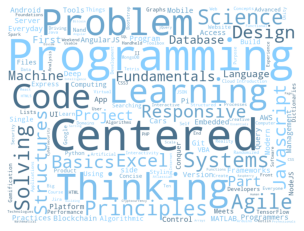

In [ ]:
plt.imshow(MyWordCloud)
plt.axis('off')
MyWordCloud.to_file('cs.png')